In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)


In [3]:
# Add the latititudes and longitutes to a list. 
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

603

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval:1-50")
print("Second Data Retrieval:51-100")
print("Third Data Retrieval:101-150")
print("Fourth Data Retrieval:151-200")
print("Fifth Data String:201-250")
print("Sixth Data Retrieval:251-300")
print("Seventh Data Retrieval:301-350")
print("Eigth Data Retrieval:351-400")
print("Ninth Data Retrieval:401-450")
print("Tenth Data Retrieval:451-500")
print("Eleventh Data Retrieval:501-550")
print("Twelfth Data Retrieval:551-600")
print("Thirteenth Data Retrieval:601-649")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval:1-50
Second Data Retrieval:51-100
Third Data Retrieval:101-150
Fourth Data Retrieval:151-200
Fifth Data String:201-250
Sixth Data Retrieval:251-300
Seventh Data Retrieval:301-350
Eigth Data Retrieval:351-400
Ninth Data Retrieval:401-450
Tenth Data Retrieval:451-500
Eleventh Data Retrieval:501-550
Twelfth Data Retrieval:551-600
Thirteenth Data Retrieval:601-649


In [7]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_country = city_weather["sys"]["country"]
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | hirara
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | new norfolk
Processing Record 4 of Set 1 | longyearbyen
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | tiarei
Processing Record 7 of Set 1 | montlucon
Processing Record 8 of Set 1 | ponta do sol
Processing Record 9 of Set 1 | kapaa
Processing Record 10 of Set 1 | east london
Processing Record 11 of Set 1 | san carlos
Processing Record 12 of Set 1 | pevek
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | oranjemund
Processing Record 15 of Set 1 | san jose
Processing Record 16 of Set 1 | bunol
Processing Record 17 of Set 1 | cape town
Processing Record 18 of Set 1 | hobart
Processing Record 19 of Set 1 | arraial do cabo
Processing Record 20 of Set 1 | bubaque
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of Set 1 | hami
Processing Record 23 of Set 1 | kavieng
Processing Record 24 of Set 1 | tasiilaq
Processing Record 25 of 

In [ ]:
len(city_data)

591

In [ ]:
# Convert the array of dictionaries to a Pandas dataframe. 
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,77.63,71,1,16.78,PF,2022-04-15 21:51:36
1,Tiksi,71.6872,128.8694,-4.34,100,100,3.62,RU,2022-04-15 21:51:36
2,Bedi,22.5000,70.0500,78.31,75,0,10.60,IN,2022-04-15 21:51:36
3,Lorengau,-2.0226,147.2712,83.10,74,63,5.23,PG,2022-04-15 21:51:37
4,Vestmannaeyjar,63.4427,-20.2734,47.44,83,98,34.65,IS,2022-04-15 21:51:37
5,San Cristobal,7.7669,-72.2250,77.18,59,100,4.70,VE,2022-04-15 21:51:37
6,Torbay,47.6666,-52.7314,43.57,52,40,10.36,CA,2022-04-15 21:51:37
7,Hermanus,-34.4187,19.2345,53.80,67,67,15.32,ZA,2022-04-15 21:51:38
8,Umm Lajj,25.0213,37.2685,75.65,57,0,6.20,SA,2022-04-15 21:51:38
9,Gimli,50.6336,-96.9907,21.22,53,100,17.27,CA,2022-04-15 21:51:38


In [ ]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
cit_data_df = city_data_df[new_column_order]
cit_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2022-04-15 21:51:36,-23.1203,-134.9692,77.63,71,1,16.78
1,Tiksi,RU,2022-04-15 21:51:36,71.6872,128.8694,-4.34,100,100,3.62
2,Bedi,IN,2022-04-15 21:51:36,22.5000,70.0500,78.31,75,0,10.60
3,Lorengau,PG,2022-04-15 21:51:37,-2.0226,147.2712,83.10,74,63,5.23
4,Vestmannaeyjar,IS,2022-04-15 21:51:37,63.4427,-20.2734,47.44,83,98,34.65
5,San Cristobal,VE,2022-04-15 21:51:37,7.7669,-72.2250,77.18,59,100,4.70
6,Torbay,CA,2022-04-15 21:51:37,47.6666,-52.7314,43.57,52,40,10.36
7,Hermanus,ZA,2022-04-15 21:51:38,-34.4187,19.2345,53.80,67,67,15.32
8,Umm Lajj,SA,2022-04-15 21:51:38,25.0213,37.2685,75.65,57,0,6.20
9,Gimli,CA,2022-04-15 21:51:38,50.6336,-96.9907,21.22,53,100,17.27


In [ ]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [ ]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [ ]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'04/15/22'

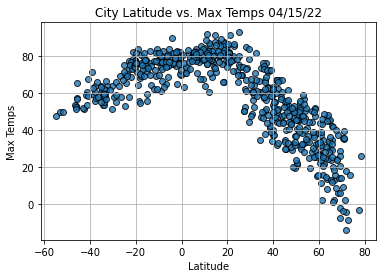

In [ ]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temps "+ time.strftime("%x"))
plt.ylabel("Max Temps")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

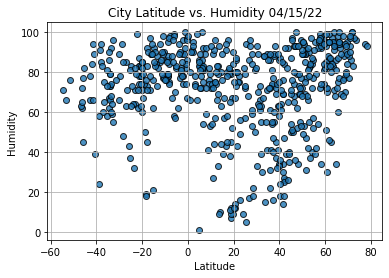

In [ ]:
# Import time module
import time

# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

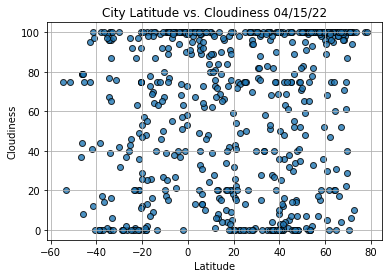

In [ ]:
# Import time module
import time

# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

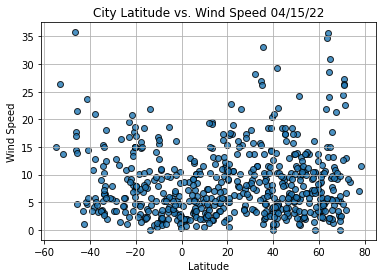

In [ ]:
# Import time module
import time

# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

In [ ]:
index13 = city_data_df.loc[13]
index13

City                    Maniitsoq
Lat                       65.4167
Lng                         -52.9
Max Temp                     24.1
Humidity                       60
Cloudiness                     98
Wind Speed                   9.42
Country                        GL
Date          2022-04-15 21:51:39
Name: 13, dtype: object

In [ ]:
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3      False
4       True
       ...  
586     True
587     True
588    False
589    False
590     True
Name: Lat, Length: 591, dtype: bool

In [ ]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Tiksi,71.6872,128.8694,-4.34,100,100,3.62,RU,2022-04-15 21:51:36
2,Bedi,22.5000,70.0500,78.31,75,0,10.60,IN,2022-04-15 21:51:36
4,Vestmannaeyjar,63.4427,-20.2734,47.44,83,98,34.65,IS,2022-04-15 21:51:37
5,San Cristobal,7.7669,-72.2250,77.18,59,100,4.70,VE,2022-04-15 21:51:37
6,Torbay,47.6666,-52.7314,43.57,52,40,10.36,CA,2022-04-15 21:51:37


In [ ]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [ ]:
# Import Matplotlib.
import matplotlib.pyplot as plt

In [ ]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

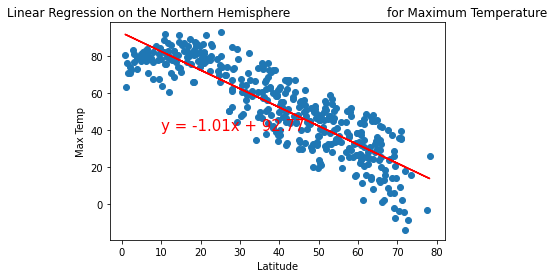

In [ ]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))                      

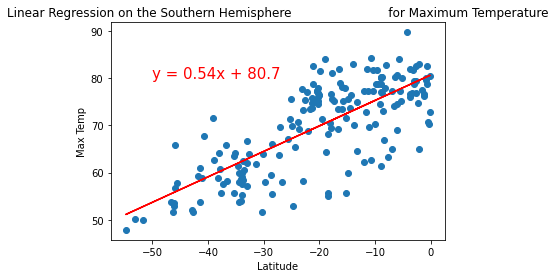

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,80))

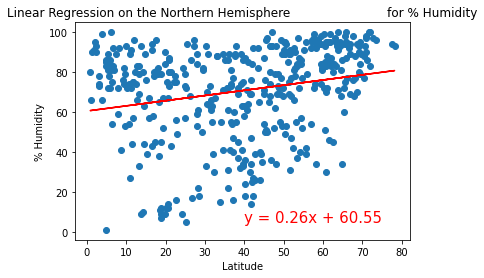

In [ ]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,5))

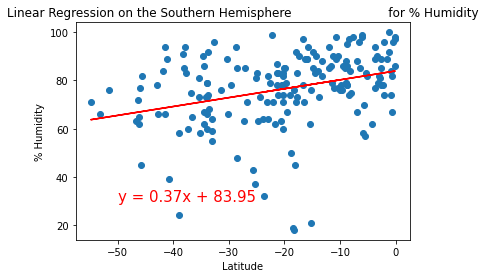

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,30))

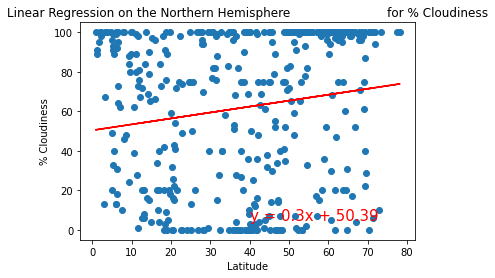

In [ ]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,5))

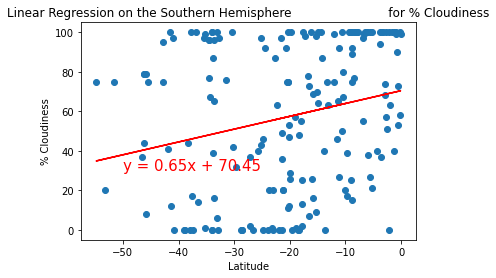

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,30))

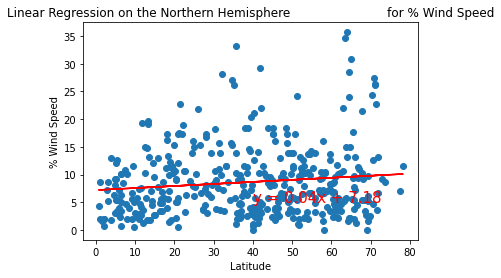

In [ ]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Wind Speed', '% Wind Speed',(40,5))

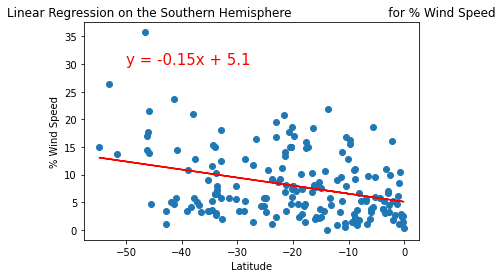

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Wind Speed', '% Wind Speed',(-50,30))